In [1]:
%autosave 600
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
#%pdb

Autosaving every 600 seconds


In [2]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ""

import torch
torch.set_num_threads(4)

In [3]:
cd ..

/master


In [4]:
import os
import numpy as np
import pdb

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets

from utils.data import get_train_dev_test_ssl

# Data

In [6]:
train, dev, test = get_train_dev_test_ssl("svhn")

Using downloaded and verified file: /master/utils/data/../../data/SVHN/train_32x32.mat
Using downloaded and verified file: /master/utils/data/../../data/SVHN/test_32x32.mat


# M1

In [6]:
from importlib import reload
from skssl.transformers import VAE, VAELoss
from skssl.predefined import SimpleCNN, ReversedSimpleCNN, WideResNet, ReversedWideResNet
from skssl.training import *

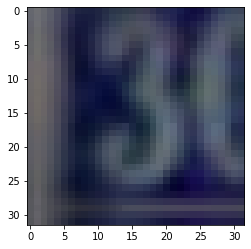

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train[6][0].permute(1, 2, 0))

In [11]:
vae = VAE(train.shape, 
          Encoder=WideResNet, 
          Decoder=ReversedSimpleCNN, 
          z_dim=64)

model_2=NeuralNetTransformer(vae, 
                             criterion=VAELoss, 
                             max_epochs=20,
                             devset=dev)

In [12]:
model_2.fit(train)

  epoch    train_loss    valid_loss      dur
-------  ------------  ------------  -------
      1      327.5228      274.1672  45.8658


<class 'skssl.training.trainer.NeuralNetTransformer'>[initialized](
  module_=VAE(
    (encoder): WideResNet(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (block1): Sequential(
        (0): _ResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (conv_shortcut): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): _ResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv1): Conv2d(32, 32, kernel_size

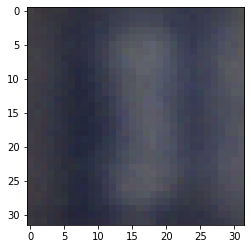

In [13]:
import matplotlib.pyplot as plt
pred=model_2.forward(train[6][0].unsqueeze(0))[2].squeeze(0)
plt.imshow(pred.permute(1, 2, 0))

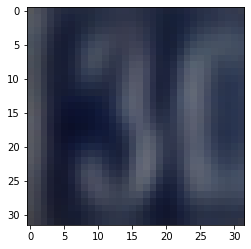

In [15]:
import matplotlib.pyplot as plt
pred=model_2.forward(train[6][0].unsqueeze(0))[0].squeeze(0)
plt.imshow(pred.permute(1, 2, 0))

In [16]:
vae = VAE(SimpleCNN, 
          ReversedSimpleCNN, 
          train.shape, z_dim=64)

model_3=NeuralNetEstimator(vae, 
                   criterion=VAELoss, 
                   criterion__distribution="bernoulli",
                   optimizer=Adam,
                   lr=0.001,
                  max_epochs=20,
                  device="cuda",
                  verbose=3,
                  train_split=predefined_split(dev),
                   iterator_train__shuffle=True,
                    callbacks=[ProgressBar()],
                        warm_start=True)

In [17]:
model_3.fit(train)

  epoch    train_loss    valid_loss      dur
-------  ------------  ------------  -------
      1     1945.9181     1903.1828  20.3216


      2     1893.1040     1887.7545  20.2839


      3     1884.8780     1882.4309  20.2622


      4     1880.0729     1877.7177  20.3673


      5     1876.6595     1878.1355  20.2348


      6     1874.1921     1873.4138  20.2715


      7     1872.9274     1873.5658  20.3146


      8     1871.2156     1870.4402  20.0157


      9     1870.1398     1872.5803  19.8500


     10     1868.7802     1870.2695  19.8091


     11     1868.2274     1867.9880  20.1546


     12     1867.3724     1868.9672  19.6214


     13     1866.8253     1869.3531  19.9486


     14     1866.3394     1866.4194  20.2558


     15     1865.7064     1866.4010  20.5632


     16     1865.5971     1866.4231  19.9262


     17     1864.9588     1865.1325  20.0327


     18     1864.5915     1864.6500  20.4255


     19     1864.4066     1865.3915  20.3866


     20     1864.2119     1864.6998  20.4205


<class 'skssl.pipeline.NeuralNetEstimator'>[initialized](
  module_=VAE(
    (encoder): SimpleCNN(
      (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv3): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (lin1): Linear(in_features=512, out_features=256, bias=True)
      (lin2): Linear(in_features=256, out_features=256, bias=True)
      (lin3): Linear(in_features=256, out_features=128, bias=True)
    )
    (decoder): ReversedSimpleCNN(
      (conv1): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv3): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (lin1): Linear(in_features=256, out_features=512, bias=True)
      (lin2): Linear(in_features=256, out_features=256, bias=True)
      (lin3): L

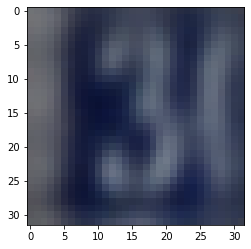

In [18]:
import matplotlib.pyplot as plt
pred=model_3.forward(train[6][0].unsqueeze(0))[0].squeeze(0)
plt.imshow(pred.permute(1, 2, 0))

In [42]:
vae = VAE(lambda *args: WideResNet(*args,widen_factor=1), 
          ReversedSimpleCNN, 
          train.shape, z_dim=64)

model_4=NeuralNetEstimator(vae, 
                   criterion=VAELoss, 
                   criterion__distribution="laplace",
                   optimizer=Adam,
                   lr=0.001,
                  max_epochs=20,
                  device="cuda",
                  verbose=3,
                  train_split=predefined_split(dev),
                   iterator_train__shuffle=True,
                    callbacks=[ProgressBar()],
                        warm_start=True)

In [43]:
model_4.fit(train)

  epoch    train_loss    valid_loss      dur
-------  ------------  ------------  -------
      1      260.1712      214.2362  30.6708


      2      200.7688      181.7297  30.6072


      3      184.0447      175.7913  30.5512


      4      174.8437      169.2731  30.6083


      5      170.5813      163.6688  30.5964


      6      165.2493      164.7864  30.6289


      7      163.3696      159.8175  30.6125


      8      156.4900      150.1004  30.6101


      9      152.4424      148.6672  30.6467


     10      150.6904      151.9948  30.6112


     11      148.6976      143.2536  30.6159


     12      146.6283      138.3553  30.6142


     13      144.2113      138.7528  30.6038


     14      140.9474      149.0927  30.6362


     15      142.2745      146.4243  30.6415


     16      138.2582      131.3089  29.5361


     17      138.1254      127.6807  29.2122


     18      137.5191      129.6123  29.1210


     19      135.2289      129.8223  29.2018


     20      131.5714      133.7563  30.6037


<class 'skssl.pipeline.NeuralNetEstimator'>[initialized](
  module_=VAE(
    (encoder): WideResNet(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (block1): Sequential(
        (0): _ResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (1): _ResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(16, eps=1e-05, mom

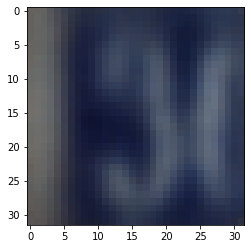

In [ ]:
import matplotlib.pyplot as plt
pred=model_4.forward(train[6][0].unsqueeze(0))[0].squeeze(0)
plt.imshow(pred.permute(1, 2, 0))

In [11]:
vae = VAE(SimpleCNN, 
          lambda *args: ReversedWideResNet(*args,widen_factor=1), 
          train.shape, 
          z_dim=64)

model_5=NeuralNetEstimator(vae, 
                   criterion=VAELoss, 
                   criterion__distribution="laplace",
                   optimizer=Adam,
                   lr=0.001,
                  max_epochs=20,
                  device="cuda",
                  verbose=3,
                  train_split=predefined_split(dev),
                   iterator_train__shuffle=True,
                    callbacks=[ProgressBar()],
                        warm_start=True)

In [12]:
model_5.fit(train)

  epoch    train_loss    valid_loss      dur
-------  ------------  ------------  -------
      1      285.2098      227.8794  43.7340


      2      208.4301      205.0808  43.8532


      3      180.1717      382.7248  43.7874


      4      174.3233      183.3119  43.8436


      5      163.6612      222.2045  43.8975


      6      156.1334      159.2551  43.8574


      7      150.5609      173.8259  43.8692


      8      146.1159      152.2851  43.8490


      9      142.8951      161.6822  43.8591


     10      140.3292      170.4035  43.8508


     11      146.8429      154.4518  43.8451


     12      136.9403      185.1928  43.8167


     13      135.0293      188.0713  43.8400


     14      133.1355      211.3569  43.8457


     15      132.1952      176.7854  43.8576


     16      131.0104      209.7797  43.8355


     17      132.3190      192.6136  43.8456


     18      128.0537      225.1814  38.2787


     19      131.5994      143.2301  37.7700


     20      126.5012      159.3547  37.7742


<class 'skssl.pipeline.NeuralNetEstimator'>[initialized](
  module_=VAE(
    (encoder): SimpleCNN(
      (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv3): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (lin1): Linear(in_features=512, out_features=256, bias=True)
      (lin2): Linear(in_features=256, out_features=256, bias=True)
      (lin3): Linear(in_features=256, out_features=128, bias=True)
    )
    (decoder): ReversedWideResNet(
      (conv): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (block1): Sequential(
        (0): _ReversedResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv1): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       

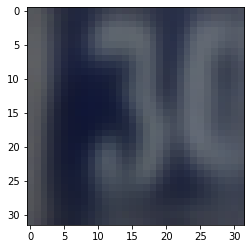

In [13]:
import matplotlib.pyplot as plt
pred=model_5.forward(train[6][0].unsqueeze(0))[0].squeeze(0)
plt.imshow(pred.permute(1, 2, 0))

In [113]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F

from skssl.utils.helpers import (is_valid_image_shape, closest_power2,
                                 ReversedConv2d, ReversedLinear)
from skssl.utils.initialization import weights_init

# to replicate https://github.com/brain-research/realistic-ssl-evaluation/
CONV_KWARGS = dict(kernel_size=3, padding=1, bias=False)
# The implementation above uses default tensorflow batch norm aruments so
# momentum = 1 - 0.999 = 1e-3. But this doesn't work with pytorch, probably due
# how the moving average is intialized (i.e would take too many steps to
# find good values in pytorch because bad init) => use pytorch default
BATCHNORM_KWARGS = dict(momentum=1e-1)


class WideResNet(nn.Module):
    """Wide Resnet as used in [1].

    Notes
    -----
    - Number of parameters will be around 1.5M (depends on inputs outputs).
    - Number of conv layers is `1 + 3 + 6 * n_res_unit`. Default 28.

    Parameters
    ----------
    x_shape : tuple of ints
        Shape of the input images. Only tested on square images with width being
        a power of 2 and greater or equal than 16. E.g. (1,32,32) or (3,64,64).

    n_out : int
        Number of outputs.

    n_res_unit : int, optional
        Number of residual layers for each of the 3 residual block.

    widen_factor : int, optional
        Factor used to control the number of channels of the hidden layers.

    leakiness : float, optional
        Leakiness for leaky relu.

    Return
    ------
    out : torch.Tensor, size = [batch, size]
        Flattent raw output (no activations).

    References
    ----------
    [1] Oliver, A., Odena, A., Raffel, C. A., Cubuk, E. D., & Goodfellow, I.
        (2018). Realistic evaluation of deep semi-supervised learning algorithms.
        In Advances in Neural Information Processing Systems (pp. 3235-3246).
    """

    def __init__(self, x_shape, n_out, n_res_unit=4, widen_factor=2, leakiness=0.1,
                 _Conv=nn.Conv2d, _Linear=nn.Linear, **kwargs):
        super().__init__()

        is_valid_image_shape(x_shape, min_width=16)
        self.x_shape = x_shape

        n_chan = [self.x_shape[0], 16, 16 * widen_factor, 32 * widen_factor, 64 * widen_factor]
        self.n_chan_fin = n_chan[4]

        # padding 1 gives same output size in our case (pytorch doesn't suport "SAME")
        self.conv = _Conv(n_chan[0], n_chan[1], stride=1, **CONV_KWARGS)
        self.block1 = _get_res_block(n_res_unit, n_chan[1], n_chan[2], 1,
                                     leakiness, True, **kwargs)  # check TRUE
        self.block2 = _get_res_block(n_res_unit, n_chan[2], n_chan[3], 2,
                                     leakiness, False, **kwargs)  # check FALSE
        self.block3 = _get_res_block(n_res_unit, n_chan[3], self.n_chan_fin, 2,
                                     leakiness, False, **kwargs)  # check FALSE

        self.bn = nn.BatchNorm2d(self.n_chan_fin, **BATCHNORM_KWARGS)
        self.act = nn.LeakyReLU(negative_slope=leakiness)
        self.fc = _Linear(self.n_chan_fin, n_out)

        self.reset_parameters()

    def reset_parameters(self):
        weights_init(self)

    def forward(self, x):
        out = self.conv(x)
        out = self.block1(out)  # check
        out = self.block2(out)  # check
        out = self.block3(out)  # check
        out = self.act(self.bn(out))  # check
        # global average over all pixels left
        out = F.adaptive_avg_pool2d(out, 1).view(-1, self.n_chan_fin)  # check
        return self.fc(out)  # check


class ReversedWideResNet(WideResNet):
    """
    Reversed version of `WideResNet`. The number of parameters is closer to 2.2M
    because has to add layers to undo global average pooling. Concolution layers
    are replaced with Transposed Convolutions.
    """

    def __init__(self, x_shape, n_out, **kwargs):

        super().__init__(x_shape, n_out, _Conv=ReversedConv2d,
                         _Linear=ReversedLinear, is_reverse=True, **kwargs)

        self.fc2 = nn.Linear(self.n_chan_fin, self.n_chan_fin * 2)
        self.fc3 = nn.Linear(self.n_chan_fin * 2, self.n_chan_fin * 4)

        # upsample by 2 until reaches the correct size => with default param
        # works with any images that are larger than (n_chan, 16, 16), and are
        # square with a width being a power of 2 (e.g. (3,64,64), (1,128,128), ...)
        tmp_upsampling = []
        for _ in range(int(math.log2(self.x_shape[1])) - 4 + 1):
            tmp_upsampling.append(nn.ConvTranspose2d(self.n_chan_fin, self.n_chan_fin,
                                                     4, stride=2, padding=1))
            tmp_upsampling.append(self.act)
        self.tmp_upsampling = nn.Sequential(*tmp_upsampling) if len(tmp_upsampling) != 0 else None

        self.reset_parameters()

    def reset_parameters(self):
        weights_init(self)

    def forward(self, x):
        batch_size = x.size(0)
        out = self.act(self.fc(x))
        out = self.act(self.fc2(out))
        out = self.act(self.fc3(out))
        out = out.view(batch_size, self.n_chan_fin, -1)
        # make square image
        out = out.view(batch_size, self.n_chan_fin, int(out.size(-1)**0.5), int(out.size(-1)**0.5))
        out = self.bn(out)
        if self.tmp_upsampling is not None:
            out = self.tmp_upsampling(out)

        # reversed order
        out = self.block3(out)
        out = self.block2(out)
        out = self.block1(out)
        out = self.conv(out)

        return out


def _get_res_block(n_layers, in_filter, out_filter, stride, leakiness,
                   is_act_before_res, is_reverse=False):

    layer = _ResLayer if not is_reverse else _ReversedResLayer

    layer_transf = layer(in_filter, out_filter, stride,
                         is_act_before_res=is_act_before_res, leakiness=leakiness)
    layers_id = [layer(out_filter, out_filter, 1, is_act_before_res=False, leakiness=leakiness)
                 for i in range(1, n_layers)]

    if not is_reverse:
        # Encoder like
        layers = [layer_transf] + layers_id
    else:
        # Decoder like
        layers = layers_id + [layer_transf]

    return nn.Sequential(*layers)


class _ResLayer(nn.Module):
    def __init__(self, in_filter, out_filter, stride,
                 leakiness=1e-2, is_act_before_res=True, _Conv=nn.Conv2d):
        super().__init__()
        self.act = nn.LeakyReLU(negative_slope=leakiness)
        self.bn1 = nn.BatchNorm2d(in_filter, **BATCHNORM_KWARGS)
        self.conv1 = _Conv(in_filter, out_filter, stride=stride, **CONV_KWARGS)
        self.bn2 = nn.BatchNorm2d(out_filter, **BATCHNORM_KWARGS)
        self.conv2 = _Conv(out_filter, out_filter, stride=1, **CONV_KWARGS)
        self.is_in_neq_out = (in_filter != out_filter)
        if self.is_in_neq_out:
            self.conv_shortcut = _Conv(in_filter, out_filter, kernel_size=1,
                                       stride=stride, padding=0, bias=False)
        self.is_act_before_res = is_act_before_res

    def forward(self, x):
        if self.is_act_before_res:
            x = self.act(self.bn1(x))
            out = self.conv1(x)
        else:
            out = self.conv1(self.act(self.bn1(x)))

        out = self.conv2(self.act(self.bn2(out)))
        res = self.conv_shortcut(x) if self.is_in_neq_out else x
        return res + out


class _ReversedResLayer(_ResLayer):
    def __init__(self, in_filter, out_filter, stride, **kwargs):
        super().__init__(in_filter, out_filter, stride, _Conv=ReversedConv2d, **kwargs)
        self.stride = stride

    def forward(self, x):
        # Litteraly reverses everything
        if self.is_act_before_res:
            x = self.act(self.conv2(x))
            out = self.bn2(x)
        else:
            out = self.bn2(self.act(self.conv2(x)))

        output_size = out.size()
        # make sure that the output is a power of 2 because Conv2d is actually not
        # a bijective transformation => TransposeConv2d might return the wrong size
        output_size = output_size[:-2] + (closest_power2(output_size[-2] * self.stride),
                                          closest_power2(output_size[-2] * self.stride))
        out = self.bn1(self.act(self.conv1(out, output_size=output_size)))
        res = self.conv_shortcut(x, output_size=output_size) if self.is_in_neq_out else x
        return res + out


In [114]:
vae = VAE(SimpleCNN, 
          lambda *args: ReversedWideResNet(*args,widen_factor=1), 
          train.shape, 
          z_dim=64)

model_6=NeuralNetEstimator(vae, 
                   criterion=VAELoss, 
                   criterion__distribution="bernoulli",
                   optimizer=Adam,
                   lr=0.001,
                  max_epochs=3,
                  device="cuda",
                  verbose=3,
                  train_split=predefined_split(dev),
                   iterator_train__shuffle=True,
                    callbacks=[ProgressBar()],
                        warm_start=True)

In [115]:
from torchsummary import summary
summary(vae.cuda(), train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 16, 16]           1,568
            Conv2d-2             [-1, 32, 8, 8]          16,416
            Conv2d-3             [-1, 32, 4, 4]          16,416
            Linear-4                  [-1, 256]         131,328
            Linear-5                  [-1, 256]          65,792
            Linear-6                  [-1, 128]          32,896
         SimpleCNN-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           4,160
         LeakyReLU-9                   [-1, 64]               0
        LeakyReLU-10                   [-1, 64]               0
           Linear-11                  [-1, 128]           8,320
        LeakyReLU-12                  [-1, 128]               0
        LeakyReLU-13                  [-1, 128]               0
           Linear-14                  [

In [116]:
model_6.fit(train)

  epoch    train_loss    valid_loss      dur
-------  ------------  ------------  -------
      1   253807.6716   245349.6449  37.0065


      2   244322.4952   248149.4342  37.2168


      3   242718.5927   243692.7252  43.0966


<class 'skssl.pipeline.NeuralNetEstimator'>[initialized](
  module_=VAE(
    (encoder): SimpleCNN(
      (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv3): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (lin1): Linear(in_features=512, out_features=256, bias=True)
      (lin2): Linear(in_features=256, out_features=256, bias=True)
      (lin3): Linear(in_features=256, out_features=128, bias=True)
    )
    (decoder): ReversedWideResNet(
      (conv): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (block1): Sequential(
        (0): _ReversedResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv1): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       

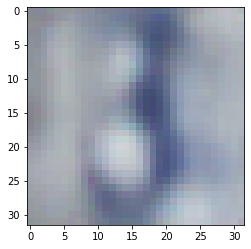

In [112]:
import matplotlib.pyplot as plt
pred=model_6.forward(train[5][0].unsqueeze(0))[0].squeeze(0)
plt.imshow(pred.permute(1, 2, 0))

In [10]:
vae = VAE(WideResNet, 
          ReversedWideResNet, 
          train.shape, 
          z_dim=128)

model_7=NeuralNetEstimator(vae, 
                   criterion=VAELoss, 
                   criterion__distribution="laplace",
                   optimizer=Adam,
                   lr=0.001,
                  max_epochs=50,
                  device="cuda",
                  verbose=3,
                  train_split=predefined_split(dev),
                   iterator_train__shuffle=True,
                    callbacks=[ProgressBar()],
                        warm_start=True)

In [11]:
model_7.fit(train)

  epoch    train_loss          valid_loss      dur
-------  ------------  ------------------  -------
      1    30908.8821  1322010259512.3357  54.8690


      2    28278.6478    28238.8566  46.2457


      3    28096.4668    27967.8527  46.2576


      4    28014.7923    28221.7183  46.6913


TypeError: Cannot handle this data type

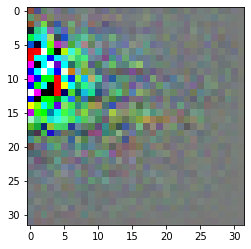

In [16]:
import matplotlib.pyplot as plt
pred=model_7.forward(train[6][0].unsqueeze(0))[0].squeeze(0)
plt.imshow(pred.permute(1, 2, 0))

In [ ]:
vae = VAE(WideResNet, 
          ReversedWideResNet, 
          train.shape, 
          z_dim=128)

model_8=NeuralNetEstimator(vae, 
                   criterion=VAELoss, 
                   criterion__distribution="bernoulli",
                   optimizer=Adam,
                   lr=0.001,
                  max_epochs=50,
                  device="cuda",
                  verbose=3,
                  train_split=predefined_split(dev),
                   iterator_train__shuffle=True,
                    callbacks=[ProgressBar()],
                        warm_start=True)

In [ ]:
model_8.fit(train)

     13     1876.3377     1882.7949  65.0420


     14     1874.3540     1885.7474  64.9925


     15     1872.8952     1909.7834  64.9405


     16     1872.1655     1882.1233  65.0627


     17     1870.9917     1883.8751  64.9890


     18     1869.6920     1948.9254  64.9491


     19     1868.9914     1878.5822  65.1439


     20     1868.0401     1890.9781  65.0555


     21     1867.9189     1948.9568  65.0368


     22     1867.3757     1927.0323  65.2016


     23     1866.6634     1897.7210  64.9081


     24     1865.8821     1884.8922  65.0810


TypeError: Invalid shape (32, 32, 1) for image data

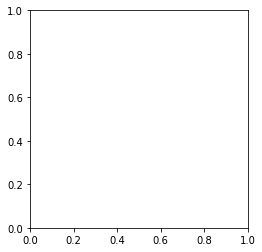

In [39]:
import matplotlib.pyplot as plt
pred=model_8.forward(train[6][0].unsqueeze(0))[0].squeeze(0)
plt.imshow(pred.permute(1, 2, 0))

In [2]:
import torch
sum(torch.arange(10) for i in range(2))

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [44]:
train, dev, test = get_train_dev_test_ssl("mnist")

In [ ]:
vae = VAE(WideResNet, 
          ReversedWideResNet, 
          train.shape, 
          z_dim=64)

model_9=NeuralNetEstimator(vae, 
                   criterion=VAELoss, 
                   criterion__distribution="bernoulli",
                   optimizer=Adam,
                   lr=0.001,
                  max_epochs=20,
                  device="cuda",
                  verbose=3,
                  train_split=predefined_split(dev),
                   iterator_train__shuffle=True,
                    callbacks=[ProgressBar()],
                        warm_start=True)

In [ ]:
model_8.fit(train)

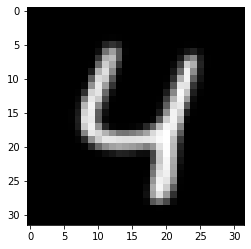

In [45]:
import matplotlib.pyplot as plt
pred=model_9.forward(test[4][0].unsqueeze(0))[0].squeeze()
plt.imshow(pred, cmap='gray')

In [ ]:
vae = VAE(WideResNet, 
          ReversedWideResNet, 
          train.shape, 
          z_dim=64)

model_10=NeuralNetEstimator(vae, 
                   criterion=VAELoss, 
                   criterion__distribution="laplace",
                   optimizer=Adam,
                   lr=0.001,
                  max_epochs=20,
                  device="cuda",
                  verbose=3,
                  train_split=predefined_split(dev),
                   iterator_train__shuffle=True,
                    callbacks=[ProgressBar()],
                        warm_start=True)

In [ ]:
model_10.fit(train)

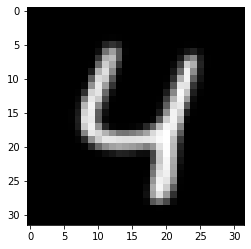

In [48]:
import matplotlib.pyplot as plt
pred=model_10.forward(test[4][0].unsqueeze(0))[0].squeeze()
plt.imshow(pred, cmap='gray')